<a href="https://colab.research.google.com/github/AbdielCJ/checkpoint1/blob/master/Breve_an%C3%A1lisis_de_Olist_y_del_Embudo_de_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lectura y limpieza de BBDD

## Funnel

### 1 - MQL

In [ ]:
mql = pd.read_csv('olist_marketing_qualified_leads_dataset.csv')
mql_clean = mql.drop(columns=['first_contact_date', 'landing_page_id'])
print(mql_clean.shape)
mql_clean.head(3)

(8000, 2)


,mql_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,paid_search
2,b4bc852d233dfefc5131f593b538befa,organic_search


In [ ]:
mql_clean.isna().sum()

mql_id     0
origin    60
dtype: int64

In [ ]:
mql_clean = mql_clean.dropna()

In [ ]:
mql_clean.isna().sum()

mql_id    0
origin    0
dtype: int64

In [ ]:
mql_clean.shape

(7940, 2)

In [ ]:
mql_clean.dtypes

mql_id    object
origin    object
dtype: object

### 2 - Tratos

In [ ]:
deals = pd.read_csv('olist_closed_deals_dataset.csv')
deals_clean = deals.drop(columns=['sdr_id', 'sr_id', 'won_date', 'has_gtin', 'average_stock', 'declared_product_catalog_size'])
print(deals_clean.shape)
deals_clean.head(3)

(842, 8)


,mql_id,seller_id,business_segment,lead_type,lead_behaviour_profile,has_company,business_type,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,pet,online_medium,cat,NaN,reseller,0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,car_accessories,industry,eagle,NaN,reseller,0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,home_appliances,online_big,cat,NaN,reseller,0


In [ ]:
deals_clean.isna().sum()

mql_id                        0
seller_id                     0
business_segment              1
lead_type                     6
lead_behaviour_profile      177
has_company                 779
business_type                10
declared_monthly_revenue      0
dtype: int64

In [ ]:
deals_clean['has_company'] = deals_clean['has_company'].fillna(False)
deals_clean['business_segment'] = deals_clean['business_segment'].fillna('Unknown')
deals_clean['lead_type'] = deals_clean['lead_type'].fillna('Unknown')
deals_clean['lead_behaviour_profile'] = deals_clean['lead_behaviour_profile'].fillna('Unknown')
deals_clean['business_type'] = deals_clean['business_type'].fillna('Unknown')

In [ ]:
deals_clean.isna().sum()

mql_id                      0
seller_id                   0
business_segment            0
lead_type                   0
lead_behaviour_profile      0
has_company                 0
business_type               0
declared_monthly_revenue    0
dtype: int64

In [ ]:
deals_clean.dtypes

mql_id                      object
seller_id                   object
business_segment            object
lead_type                   object
lead_behaviour_profile      object
has_company                   bool
business_type               object
declared_monthly_revenue     int64
dtype: object

## E-Commerce

### 1 - Vendedores

In [ ]:
sellers = pd.read_csv('olist_sellers_dataset.csv')
sellers_clean = sellers.drop(columns=['seller_state'])
print(sellers_clean.shape)
sellers_clean.head(3)

(3095, 3)


,seller_id,seller_zip_code_prefix,seller_city
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro


In [ ]:
sellers_clean.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
dtype: int64

In [ ]:
sellers_clean.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
dtype: object

### 2 - Geolocalización

In [ ]:
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
geolocation_clean = geolocation.drop(columns=['geolocation_state'])
print(geolocation_clean.shape)
geolocation_clean.head(3)

(1000163, 4)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city
0,1037,-23.545621,-46.639292,sao paulo
1,1046,-23.546081,-46.644820,sao paulo
2,1046,-23.546129,-46.642951,sao paulo


In [ ]:
geolocation_clean.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
dtype: int64

In [ ]:
geolocation_clean.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
dtype: object

### 3 - Clientes

In [ ]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers_clean = customers.drop(columns=['customer_unique_id', 'customer_state'])
print(customers_clean.shape)
customers_clean.head(3)

(99441, 3)


,customer_id,customer_zip_code_prefix,customer_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo


In [ ]:
customers_clean.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
dtype: int64

In [ ]:
customers_clean.dtypes

customer_id                 object
customer_zip_code_prefix     int64
customer_city               object
dtype: object

### 4 - Órdenes

In [ ]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders_clean = orders.drop(columns=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
print(orders_clean.shape)
orders_clean.head(3)

(99441, 3)


,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered


In [ ]:
orders_clean.isna().sum()

order_id        0
customer_id     0
order_status    0
dtype: int64

In [ ]:
orders_clean.dtypes

order_id        object
customer_id     object
order_status    object
dtype: object

### 5 - Artículos ordenados

In [ ]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items_clean = order_items.drop(columns = ['shipping_limit_date', 'freight_value'])
print(order_items_clean.shape)
order_items_clean.head(3)

(112650, 5)


,order_id,order_item_id,product_id,seller_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.0


In [ ]:
order_items_clean.isna().sum()

order_id         0
order_item_id    0
product_id       0
seller_id        0
price            0
dtype: int64

In [ ]:
order_items_clean.dtypes

order_id          object
order_item_id      int64
product_id        object
seller_id         object
price            float64
dtype: object

### 6 - Productos

In [ ]:
products = pd.read_csv('olist_products_dataset.csv')
products_clean = products.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])
print(products_clean.shape)
products_clean.head(3)

(32951, 2)


,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer


In [ ]:
products_clean.isna().sum()

product_id                 0
product_category_name    610
dtype: int64

In [ ]:
products_clean['product_category_name'] = products_clean['product_category_name'].fillna('Unknown')

In [ ]:
products_clean.isna().sum()

product_id               0
product_category_name    0
dtype: int64

In [ ]:
products_clean.dtypes

product_id               object
product_category_name    object
dtype: object

### 7 - Pagos

In [ ]:
payments = pd.read_csv('olist_order_payments_dataset.csv')
payments_clean = payments.drop(columns = ['payment_sequential', 'payment_installments'])
print(payments_clean.shape)
payments_clean.head(3)

(103886, 3)


,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71


In [ ]:
payments_clean.isna().sum()

order_id         0
payment_type     0
payment_value    0
dtype: int64

In [ ]:
payments_clean.dtypes

order_id          object
payment_type      object
payment_value    float64
dtype: object

### 8 - Reseñas

In [ ]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
reviews_clean = reviews.drop(columns=['review_id', 'review_creation_date', 'review_answer_timestamp'])
print(reviews_clean.shape)
reviews_clean.head(3)

(100000, 4)


,order_id,review_score,review_comment_title,review_comment_message
0,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN
1,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN
2,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN


In [ ]:
reviews_clean.isna().sum()

order_id                      0
review_score                  0
review_comment_title      88285
review_comment_message    58247
dtype: int64

In [ ]:
reviews_clean['review_comment_title'] = reviews_clean['review_comment_title'].fillna('Unkown')
reviews_clean['review_comment_message'] = reviews_clean['review_comment_message'].fillna('Unkown')

In [ ]:
reviews_clean.isna().sum()

order_id                  0
review_score              0
review_comment_title      0
review_comment_message    0
dtype: int64

In [ ]:
reviews_clean.dtypes

order_id                  object
review_score               int64
review_comment_title      object
review_comment_message    object
dtype: object

# Análisis de Datos

## Análisis Exploratorio

### Medidas de tendencia central



In [ ]:
# De la tabla de deals_clean
print(f"La media es: {round(deals_clean['declared_monthly_revenue'].mean(), 2)}")
print(f"La mediana es: {deals_clean['declared_monthly_revenue'].median()}")
print(f"La moda es: {deals_clean['declared_monthly_revenue'].mode()}")

La media es: 73377.68
La mediana es: 0.0
La moda es: 0    0
dtype: int64


In [ ]:
# De la tabla de order_items_clean
print(f"La media es: {round(order_items_clean['price'].mean(), 2)}")
print(f"La mediana es: {order_items_clean['price'].median()}")
print(f"La moda es: {order_items_clean['price'].mode()}")

La media es: 120.65
La mediana es: 74.99
La moda es: 0    59.9
dtype: float64


In [ ]:
# De la tabla de payments_clean
print(f"La media es: {round(payments_clean['payment_value'].mean(), 2)}")
print(f"La mediana es: {payments_clean['payment_value'].median()}")
print(f"La moda es: {payments_clean['payment_value'].mode()}")

La media es: 154.1
La mediana es: 100.0
La moda es: 0    50.0
dtype: float64


In [ ]:
# De la tabla de reviews_clean
print(f"La moda es: {reviews_clean['review_score'].mode()}")

La moda es: 0    5
dtype: int64


### Medidas de dispersión

In [ ]:
# De la tabla de deals_clean
print(f"La desviación estándar es: {round(deals_clean['declared_monthly_revenue'].std(), 2)}")

La desviación estándar es: 1744799.18


In [ ]:
# De la tabla de order_items_clean
print(f"La desviación estándar es: {round(order_items_clean['price'].std(), 2)}")

La desviación estándar es: 183.63


In [ ]:
# De la tabla de payments_clean
print(f"La desviación estándar es: {round(payments_clean['payment_value'].std(), 2)}")

La desviación estándar es: 217.49


In [ ]:
# De la tabla de reviews_clean
maximo_score = reviews_clean['review_score'].max()
minimo_score = reviews_clean['review_score'].min()

print(f"El valor máximo es: {maximo_score}")
print(f"El valor mínimo es: {minimo_score}")
print(f"El rango es: {maximo_score - minimo_score}")

El valor máximo es: 5
El valor mínimo es: 1
El rango es: 4


### Visualizaciones


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


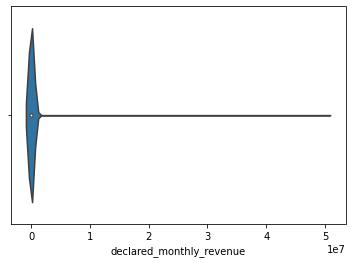

In [ ]:
sns.violinplot(deals_clean['declared_monthly_revenue'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


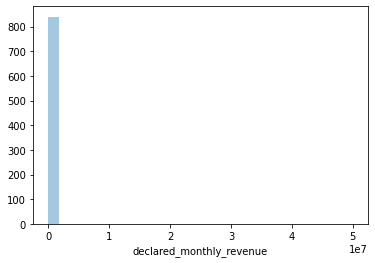

In [ ]:
ax = sns.distplot(deals_clean['declared_monthly_revenue'], kde = False, norm_hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


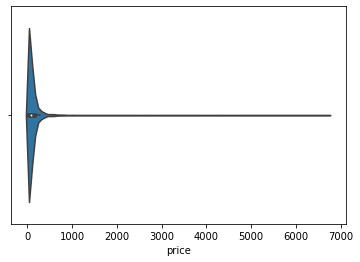

In [ ]:
sns.violinplot(order_items_clean['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


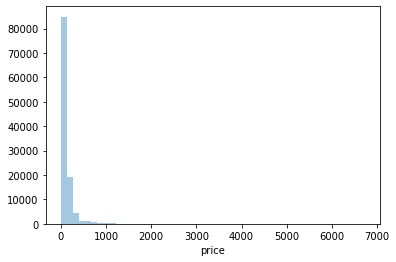

In [ ]:
ax = sns.distplot(order_items_clean['price'], kde = False, norm_hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


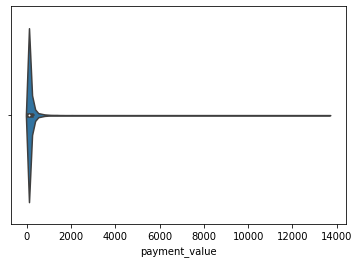

In [ ]:
sns.violinplot(payments_clean['payment_value'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


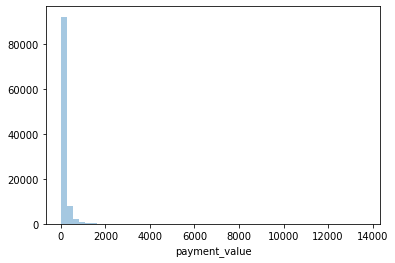

In [ ]:
ax = sns.distplot(payments_clean['payment_value'], kde = False, norm_hist=False)

## Etapas de proyecto

### 1. Comportamiento de Leads

#### 1.1. Orígenes más populares

In [ ]:
mql_clean['origin'].unique()

array(['social', 'paid_search', 'organic_search', 'email', 'unknown',
       'referral', 'direct_traffic', 'display', 'other_publicities',
       'other'], dtype=object)

In [ ]:
origenes_mas_populares = mql_clean.groupby('origin')['mql_id'].count()
origenes_mas_populares

origin
direct_traffic        499
display               118
email                 493
organic_search       2296
other                 150
other_publicities      65
paid_search          1586
referral              284
social               1350
unknown              1099
Name: mql_id, dtype: int64

In [ ]:
origenes_mas_populares_cuenta = origenes_mas_populares

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


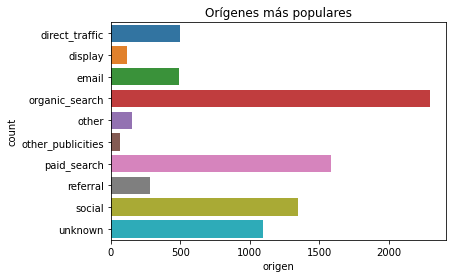

In [ ]:
ax = sns.barplot(origenes_mas_populares_cuenta, origenes_mas_populares.index, orient = 'h')
ax.set_title('Orígenes más populares')
ax.set(xlabel='origen');
ax.set(ylabel='count');

#### 1.2. Segmentos de negocio más populares

In [ ]:
segmento_de_negocio_mas_popular = deals_clean.groupby('business_segment')['mql_id'].count()
segmento_de_negocio_mas_popular = segmento_de_negocio_mas_popular.sort_values(ascending=False).head()
segmento_de_negocio_mas_popular

business_segment
home_decor                         105
health_beauty                       93
car_accessories                     77
household_utilities                 71
construction_tools_house_garden     69
Name: mql_id, dtype: int64

In [ ]:
segmento_de_negocio_mas_popular_DF = pd.DataFrame(segmento_de_negocio_mas_popular)
segmento_de_negocio_mas_popular_DF

,mql_id
business_segment,
home_decor,105
health_beauty,93
car_accessories,77
household_utilities,71
construction_tools_house_garden,69


In [ ]:
segmento_de_negocio_mas_popular_conteo = segmento_de_negocio_mas_popular_DF['mql_id']
segmento_de_negocio_mas_popular_conteo

business_segment
home_decor                         105
health_beauty                       93
car_accessories                     77
household_utilities                 71
construction_tools_house_garden     69
Name: mql_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


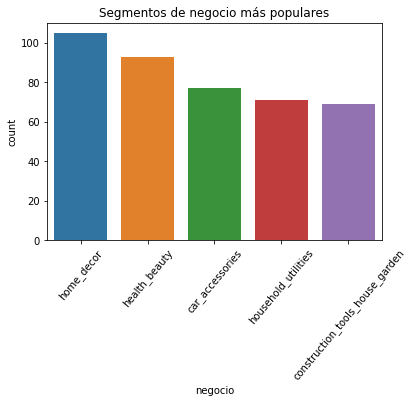

In [ ]:
ax = sns.barplot(segmento_de_negocio_mas_popular_DF.index, segmento_de_negocio_mas_popular_conteo)
ax.set_title('Segmentos de negocio más populares')
ax.set(xlabel='negocio');
ax.set(ylabel='count');
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50);

#### 1.3. Tipos de lead más comunes

In [ ]:
deals_clean['lead_type'].unique()

array(['online_medium', 'industry', 'online_big', 'online_small',
       'offline', 'online_top', 'online_beginner', 'other', 'Unknown'],
      dtype=object)

In [ ]:
leads_mas_comunes = deals_clean.groupby('lead_type')['mql_id'].count()
leads_mas_comunes

lead_type
Unknown              6
industry           123
offline            104
online_beginner     57
online_big         126
online_medium      332
online_small        77
online_top          14
other                3
Name: mql_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


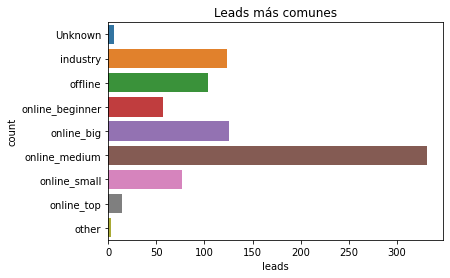

In [ ]:
ax = sns.barplot(leads_mas_comunes, leads_mas_comunes.index, orient = 'h')
ax.set_title('Leads más comunes')
ax.set(xlabel='leads');
ax.set(ylabel='count');

#### 1.4. Tipo de negocio más popular

In [ ]:
deals_clean['business_type'].unique()

array(['reseller', 'manufacturer', 'other', 'Unknown'], dtype=object)

In [ ]:
tipos_negocio_mas_comunes = deals_clean.groupby('business_type')['mql_id'].count()
tipos_negocio_mas_comunes

business_type
Unknown          10
manufacturer    242
other             3
reseller        587
Name: mql_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


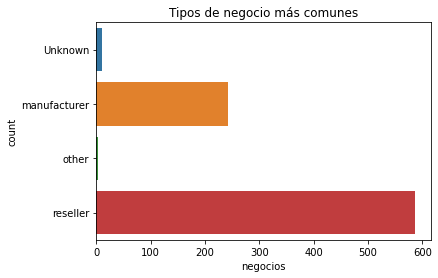

In [ ]:
ax = sns.barplot(tipos_negocio_mas_comunes, tipos_negocio_mas_comunes.index, orient = 'h')
ax.set_title('Tipos de negocio más comunes')
ax.set(xlabel='negocios');
ax.set(ylabel='count');

#### 1.5. Lead que tienen compañía

In [ ]:
tiene_o_no_compañia = deals_clean.groupby('has_company')['mql_id'].count()
tiene_o_no_compañia

has_company
False    784
True      58
Name: mql_id, dtype: int64

In [ ]:
tiene_o_no_compañia_DF = pd.DataFrame(tiene_o_no_compañia)
tiene_o_no_compañia_DF

,mql_id
has_company,
False,784
True,58


In [ ]:
tiene_o_no_compañia_conteo = tiene_o_no_compañia_DF['mql_id']
tiene_o_no_compañia_conteo 

has_company
False    784
True      58
Name: mql_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


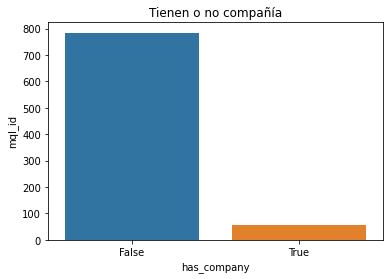

In [ ]:
ax = sns.barplot(tiene_o_no_compañia_DF.index, tiene_o_no_compañia_conteo)
ax.set_title('Tienen o no compañía');

In [ ]:
si_tienen = tiene_o_no_compañia_DF.loc[True]
si_tienen

mql_id    58
Name: True, dtype: int64

In [ ]:
no_tienen = tiene_o_no_compañia_DF.loc[False]
no_tienen

mql_id    784
dtype: int64

In [ ]:
# Porcentaje de los que sí tienen con respecto al total:
round((si_tienen / (si_tienen + no_tienen)) * 100, 2)

mql_id    6.89
dtype: float64

#### 1.6.  Promedio de ingresos mensuales declarados

In [ ]:
round(deals_clean['declared_monthly_revenue'].mean(),2)

73377.68

### 2. Productos

#### 2.1. Productos más populares

In [ ]:
productos_conteo = products_clean.groupby('product_category_name')['product_id'].count()
productos_conteo = pd.DataFrame(productos_conteo)
productos_mas_populares = productos_conteo.sort_values('product_id', ascending=False)
productos_mas_populares_grafica = productos_mas_populares.head()
productos_mas_populares_grafica

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


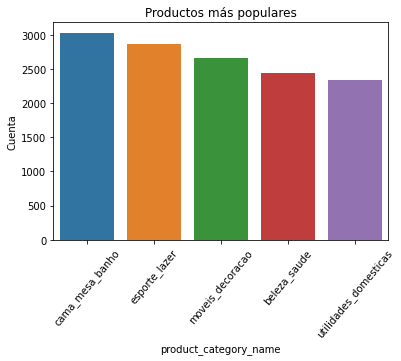

In [ ]:
ax = sns.barplot(productos_mas_populares_grafica.index, productos_mas_populares_grafica['product_id'])
ax.set_title('Productos más populares')
ax.set(ylabel='Cuenta')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50);

#### 2.2. Precios de productos populares

In [ ]:
productos_y_ordenes_items = pd.merge(products_clean, order_items_clean, left_on='product_id', right_on='product_id').sort_index()
productos_y_ordenes_items.head()

,product_id,product_category_name,order_id,order_item_id,seller_id,price
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,10.91
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,248.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,79.80
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,112.30
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,37.90


In [ ]:
cama_mesa_banho = productos_y_ordenes_items[productos_y_ordenes_items['product_category_name'] == 'cama_mesa_banho']
cama_mesa_banho['price'].unique()

array([  71.99,   41.99,  145.  ,  107.6 ,  180.  ,   89.9 ,  649.9 ,
         40.  ,   83.  ,   95.9 ,   95.  ,   99.9 ,  117.99,   99.88,
        109.  ,   29.99,   69.99,   59.  ,   24.9 ,   96.99,   64.9 ,
         95.03,  286.  ,   55.  ,   59.99,   49.  ,   48.  ,   25.5 ,
        112.9 ,  113.  ,   49.9 ,   74.99,   59.4 ,   34.9 ,   77.  ,
         39.  ,   35.  ,  155.  ,   27.99,   65.99,   34.99,   22.9 ,
         26.9 ,  142.99,  127.99,   12.25,   89.99,   87.  ,  219.  ,
         59.9 ,   53.9 ,  108.99,  109.9 ,  113.57,  119.9 ,  105.9 ,
        160.  ,   56.99,   49.99,  159.9 ,   69.9 ,   21.9 ,  540.  ,
        169.  ,  169.9 ,  260.99,  219.99,   89.  ,   51.9 ,  110.  ,
        210.  ,  140.  ,  175.99,   84.99,   79.9 ,   64.99,   54.9 ,
        134.55,   33.99,  151.99,  149.  ,  168.98,   26.  ,  111.9 ,
        437.39,   63.  ,   69.  ,  129.9 ,  124.99,  139.  ,    9.9 ,
        114.9 ,  139.9 ,    8.99,   64.  ,   91.9 ,   32.99,   51.  ,
        193.9 ,   15

In [ ]:
cama_mesa_banho_maximo = cama_mesa_banho['price'].max()
cama_mesa_banho_minimo = cama_mesa_banho['price'].min()
rango_cama_mesa_banho = cama_mesa_banho_maximo - cama_mesa_banho_minimo
rango_cama_mesa_banho

1992.99

In [ ]:
esporte_lazer = productos_y_ordenes_items[productos_y_ordenes_items['product_category_name'] == 'esporte_lazer']
esporte_lazer['price'].unique()

array([ 79.8 ,  26.7 , 285.  , ...,  31.99,  42.31, 187.43])

In [ ]:
esporte_lazer_maximo = esporte_lazer['price'].max()
esporte_lazer_minimo = esporte_lazer['price'].min()
rango_esporte_lazer = esporte_lazer_maximo - esporte_lazer_minimo
rango_esporte_lazer

4054.5

In [ ]:
moveis_decoracao = productos_y_ordenes_items[productos_y_ordenes_items['product_category_name'] == 'moveis_decoracao']
moveis_decoracao['price'].unique()

array([   9.99,   59.9 ,   49.7 ,  111.9 ,   79.9 ,   69.9 ,   64.9 ,
         39.  ,  139.9 ,   39.9 ,  148.  ,  119.9 ,   75.9 ,  199.99,
         77.  ,   47.9 ,   15.  ,   45.  ,   19.9 ,   17.9 ,   49.9 ,
         49.  ,   86.73,   55.  ,   36.99,   99.  ,   43.99,   12.99,
         97.9 ,   44.99,  149.  ,   38.4 ,   35.  ,   32.99,   49.92,
        149.9 ,   29.99,   39.99,   99.9 ,   46.5 ,  238.  ,   54.99,
         24.9 ,   12.9 ,  124.9 ,   45.9 ,   15.9 ,  259.  ,   50.9 ,
         45.8 ,   28.9 ,   34.9 ,   46.99,   14.9 ,   51.92,   57.11,
         50.1 ,   56.9 ,  134.9 ,   54.9 ,  128.8 ,   97.69,  189.  ,
         81.8 ,  137.5 ,   32.9 ,   88.99,   99.99,   98.9 ,   59.8 ,
        120.  ,   34.99,  399.99,   84.9 ,  159.9 ,   16.9 ,   48.9 ,
         54.  ,  129.  ,   75.  ,  150.78,   83.9 ,   13.9 ,   35.99,
         46.  ,   15.99,   56.  ,  129.9 ,  149.96,  189.45,  149.99,
         31.9 ,  210.  ,  229.  ,   48.09,  198.9 ,   76.9 ,   72.5 ,
         76.  ,   82

In [ ]:
moveis_decoracao_maximo = moveis_decoracao['price'].max()
moveis_decoracao_minimo = moveis_decoracao['price'].min()
rango_moveis_decoracao = moveis_decoracao_maximo - moveis_decoracao_minimo
rango_moveis_decoracao

1894.1

In [ ]:
beleza_saude = productos_y_ordenes_items[productos_y_ordenes_items['product_category_name'] == 'beleza_saude']
beleza_saude['price'].unique()

array([ 29.9 ,  95.9 ,  89.9 , ...,  42.5 , 165.7 ,  30.97])

In [ ]:
beleza_saude_maximo = beleza_saude['price'].max()
beleza_saude_minimo = beleza_saude['price'].min()
rango_beleza_saude = beleza_saude_maximo - beleza_saude_minimo
rango_beleza_saude

3122.8

In [ ]:
utilidades_domesticas = productos_y_ordenes_items[productos_y_ordenes_items['product_category_name'] == 'utilidades_domesticas']
utilidades_domesticas['price'].unique()

array([ 37.9 ,  69.9 ,  79.99, ..., 108.99, 459.9 , 154.  ])

In [ ]:
utilidades_domesticas_maximo = utilidades_domesticas['price'].max()
utilidades_domesticas_minimo = utilidades_domesticas['price'].min()
rango_utilidades_domesticas = utilidades_domesticas_maximo - utilidades_domesticas_minimo
rango_utilidades_domesticas

6731.94

#### 2.3. Vendedores de dichos productos

In [ ]:
productos_ordenes_items_vendedores = pd.merge(productos_y_ordenes_items, sellers_clean, left_on='seller_id', right_on='seller_id').sort_index()
productos_ordenes_items_vendedores.head()

,product_id,product_category_name,order_id,order_item_id,seller_id,price,seller_zip_code_prefix,seller_city
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,3694,sao paulo
1,a035b83b3628decee6e3823924e0c10f,perfumaria,b18cb761efbe70da4838435a349abd07,1,5670f4db5b62c43d542e1b2d56b0cf7c,268.38,3694,sao paulo
2,091107484dd7172f5dcfed173e4a960e,perfumaria,a7708ffa8966514c098d15e1abfa6417,1,5670f4db5b62c43d542e1b2d56b0cf7c,7.65,3694,sao paulo
3,ccac9976bafbf7e587bd2c29302e2314,perfumaria,206d1a13596872a713dba14504fdf699,1,5670f4db5b62c43d542e1b2d56b0cf7c,268.38,3694,sao paulo
4,2eadf6089620e82047e4d24101dc6759,perfumaria,f8bb4d404d187c79b86ccf852dfa345e,1,5670f4db5b62c43d542e1b2d56b0cf7c,16.88,3694,sao paulo


In [ ]:
cama_mesa_banho_vendedor = productos_y_ordenes_items[productos_y_ordenes_items['product_category_name'] == 'cama_mesa_banho']
cama_mesa_banho_vendedor['seller_id'].count()

11115

In [ ]:
esporte_lazer_vendedor = productos_y_ordenes_items[productos_y_ordenes_items['product_category_name'] == 'esporte_lazer']
esporte_lazer_vendedor['seller_id'].count()

8641

In [ ]:
moveis_decoracao_vendedor = productos_y_ordenes_items[productos_y_ordenes_items['product_category_name'] == 'moveis_decoracao']
moveis_decoracao_vendedor['seller_id'].count()

8334

In [ ]:
beleza_saude_vendedor = productos_y_ordenes_items[productos_y_ordenes_items['product_category_name'] == 'beleza_saude']
beleza_saude_vendedor['seller_id'].count()

9670

In [ ]:
utilidades_domesticas_vendedor = productos_y_ordenes_items[productos_y_ordenes_items['product_category_name'] == 'utilidades_domesticas']
utilidades_domesticas_vendedor['seller_id'].count()

6964

### 3. Tipos de pago

#### 3.1. Métodos de pago existentes

In [ ]:
payments_clean['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

#### 3.2. Métodos de pago más populares

In [ ]:
metodos_pago = payments_clean.groupby('payment_type')['order_id'].count()
metodos_pago

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
Name: order_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


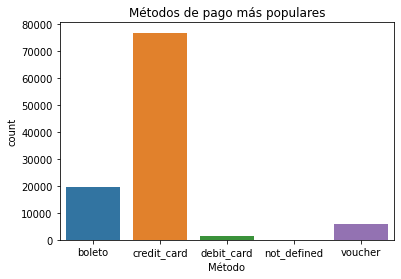

In [ ]:
ax = sns.barplot(metodos_pago.index, metodos_pago)
ax.set_title('Métodos de pago más populares')
ax.set(xlabel='Método');
ax.set(ylabel='count');

#### 3.3. Valores de los tipos de pago

In [ ]:
boleto_valor = payments_clean[payments_clean['payment_type'] == 'boleto']
boleto_valor['payment_value'].unique()

array([ 51.95, 330.66, 283.34, ..., 141.78, 160.89, 363.31])

In [ ]:
boleto_valor_maximo = boleto_valor['payment_value'].max()
boleto_valor_minimo = boleto_valor['payment_value'].min()
rango_boleto_valor = boleto_valor_maximo - boleto_valor_minimo
rango_boleto_valor

7263.26

In [ ]:
credit_card_valor = payments_clean[payments_clean['payment_type'] == 'credit_card']
credit_card_valor['payment_value'].unique()

array([ 99.33,  24.39,  65.71, ..., 356.53, 205.71, 100.55])

In [ ]:
credit_card_valor_maximo = credit_card_valor['payment_value'].max()
credit_card_valor_minimo = credit_card_valor['payment_value'].min()
rango_credit_card_valor = credit_card_valor_maximo - credit_card_valor_minimo
rango_credit_card_valor

13664.07

In [ ]:
debit_card_valor = payments_clean[payments_clean['payment_type'] == 'debit_card']
debit_card_valor['payment_value'].unique()

array([227.12,  35.14,  76.39, ...,  61.72,  25.41,  61.63])

In [ ]:
debit_card_valor_maximo = debit_card_valor['payment_value'].max()
debit_card_valor_minimo = debit_card_valor['payment_value'].min()
rango_debit_card_valor = debit_card_valor_maximo - debit_card_valor_minimo
rango_debit_card_valor

4432.12

In [ ]:
voucher_valor = payments_clean[payments_clean['payment_type'] == 'voucher']
voucher_valor['payment_value'].unique()

array([ 45.17,  69.46,  50.8 , ...,  80.4 ,  41.89, 176.56])

In [ ]:
voucher_valor_maximo = voucher_valor['payment_value'].max()
voucher_valor_minimo = voucher_valor['payment_value'].min()
rango_voucher_valor = voucher_valor_maximo - voucher_valor_minimo
rango_voucher_valor

3184.34

#### 3.4. Productos con el valor de cada tipo de pago

In [ ]:
payments_y_order_items = pd.merge(payments_clean, order_items_clean, left_on='order_id', right_on='order_id')
payments_y_order_items.head()

,order_id,payment_type,payment_value,order_item_id,product_id,seller_id,price
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,17.00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,89.90
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,113.57


In [ ]:
payments_order_items_y_products = pd.merge(payments_y_order_items, products_clean, left_on='product_id', right_on='product_id')
payments_order_items_y_products.head()

,order_id,payment_type,payment_value,order_item_id,product_id,seller_id,price,product_category_name
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,casa_construcao
1,d86305c284cecff56c7ee9d3fbd4f8d6,credit_card,93.72,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,casa_construcao
2,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,17.00,automotivo
3,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,perfumaria
4,1966886b80f14d0588adf6406afb0026,debit_card,68.89,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,perfumaria


In [ ]:
articulos_por_tipos_pagos = payments_order_items_y_products.groupby('payment_type')['product_category_name'].value_counts()
articulos_por_tipos_pagos

payment_type  product_category_name    
boleto        informatica_acessorios       2158
              cama_mesa_banho              1875
              beleza_saude                 1860
              esporte_lazer                1772
              moveis_decoracao             1735
                                           ... 
voucher       livros_importados               2
              moveis_colchao_e_estofado       2
              fashion_esporte                 1
              fashion_roupa_feminina          1
              pc_gamer                        1
Name: product_category_name, Length: 274, dtype: int64

In [ ]:
articulos_pagos_df = pd.DataFrame(articulos_por_tipos_pagos)
articulos_pagos_df

product_category_name
payment_type product_category_name                           
boleto       informatica_acessorios                      2158
             cama_mesa_banho                             1875
             beleza_saude                                1860
             esporte_lazer                               1772
             moveis_decoracao                            1735
...                                                       ...
voucher      livros_importados                              2
             moveis_colchao_e_estofado                      2
             fashion_esporte                                1
             fashion_roupa_feminina                         1
             pc_gamer                                       1

[274 rows x 1 columns]

In [ ]:
boleto = articulos_pagos_df.loc['boleto'].head()
boleto

,product_category_name
product_category_name,
informatica_acessorios,2158
cama_mesa_banho,1875
beleza_saude,1860
esporte_lazer,1772
moveis_decoracao,1735


In [ ]:
tarjeta_credito = articulos_pagos_df.loc['credit_card'].head()
tarjeta_credito

,product_category_name
product_category_name,
cama_mesa_banho,8959
beleza_saude,7566
esporte_lazer,6635
moveis_decoracao,6379
informatica_acessorios,5436


In [ ]:
voucher = articulos_pagos_df.loc['voucher'].head()
voucher

,product_category_name
product_category_name,
cama_mesa_banho,847
moveis_decoracao,530
utilidades_domesticas,505
esporte_lazer,411
beleza_saude,389


In [ ]:
tarjeta_debito = articulos_pagos_df.loc['debit_card'].head()
tarjeta_debito

,product_category_name
product_category_name,
beleza_saude,157
informatica_acessorios,148
cama_mesa_banho,142
esporte_lazer,127
utilidades_domesticas,113


### 4. Reseñas

#### 4.1. Análisis de sentimientos

In [ ]:
reviews_clean.head()

,order_id,review_score,review_comment_title,review_comment_message
0,73fc7af87114b39712e6da79b0a377eb,4,Unkown,Unkown
1,a548910a1c6147796b98fdf73dbeba33,5,Unkown,Unkown
2,f9e4b658b201a9f2ecdecbb34bed034b,5,Unkown,Unkown
3,658677c97b385a9be170737859d3511b,5,Unkown,Recebi bem antes do prazo estipulado.
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,Unkown,Parabéns lojas lannister adorei comprar pela I...


In [ ]:
!pip install TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
grouped_by_title = reviews_clean.groupby('review_comment_title')['review_comment_message'].max()
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

In [ ]:
polarity = grouped_by_title.apply(lambda x: TextBlob(x).sentiment.polarity)
polarity.name = 'polarity'

In [ ]:
df_with_polarity = pd.concat([grouped_by_title, polarity], axis=1)

In [ ]:
df_with_polarity['polarity'] != 0

review_comment_title
               False
 10            False
 4             False
 5 estrelas    False
 Avaliando     False
               ...  
👍🏼             False
👍🏽             False
👍👍👍👍👍          False
💥💥💥💥💥          False
🔟              False
Name: polarity, Length: 4601, dtype: bool

In [ ]:
no_neutral = df_with_polarity[df_with_polarity['polarity'] != 0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


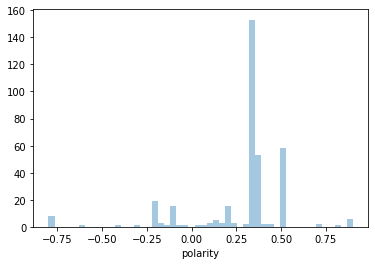

In [ ]:
sns.distplot(no_neutral['polarity'], kde=False, norm_hist=False);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


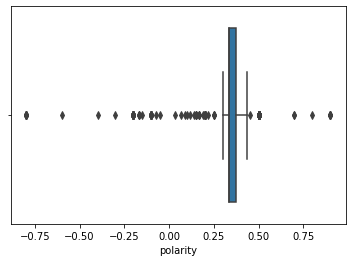

In [ ]:
sns.boxplot(no_neutral['polarity']);

In [ ]:
no_neutral[no_neutral['polarity'] > 0.75]['review_comment_message']

review_comment_title
Celular para uso simples     foi comprado para meu cunhado utilizalo no dia...
Falta quantia                        eu comprei duas bonecas lol é só veio uma
Gostei do bolso externo           o bolso externo de zíper é ideal para moedas
Gostei do produto.           a informação está clara mas é sempre bom lembr...
Produto pequeno demais.      foi entregue mas produto muito aquem do solici...
Satisfeito com o produto.    perfume de um aroma muito agradável ideal para...
ÓTIMO PRODUTO                          produto de qualidade e no tamanho ideal
Name: review_comment_message, dtype: object

In [ ]:
# Sobre la puntuación de las reseñas
reviews_clean['review_score'].unique()

array([4, 5, 1, 3, 2])

In [ ]:
puntuacion = reviews_clean.groupby('review_score')['order_id'].count()
puntuacion

review_score
1    11858
2     3235
3     8287
4    19200
5    57420
Name: order_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


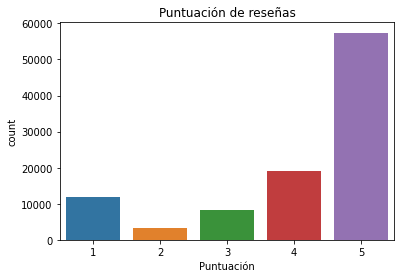

In [ ]:
ax = sns.barplot(puntuacion.index, puntuacion)
ax.set_title('Puntuación de reseñas')
ax.set(xlabel='Puntuación');
ax.set(ylabel='count');

#### 4.2. Estatus de envío

In [ ]:
orders_clean['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
estatus = orders_clean.groupby('order_status')['order_id'].count()
estatus

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


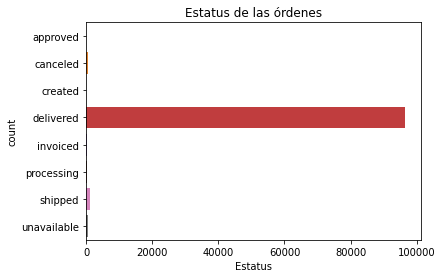

In [ ]:
ax = sns.barplot(estatus, estatus.index, orient = 'h')
ax.set_title('Estatus de las órdenes')
ax.set(xlabel='Estatus');
ax.set(ylabel='count');

### 5. Modelo

In [ ]:
deals_clean.head()

,mql_id,seller_id,business_segment,lead_type,lead_behaviour_profile,has_company,business_type,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,pet,online_medium,cat,False,reseller,0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,car_accessories,industry,eagle,False,reseller,0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,home_appliances,online_big,cat,False,reseller,0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,food_drink,online_small,Unknown,False,reseller,0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,home_appliances,industry,wolf,False,manufacturer,0


In [ ]:
deals_clean['has_company'].unique()

array([False,  True])

In [ ]:
deals_clean.corr()

,has_company,declared_monthly_revenue
has_company,1.000000,0.015617
declared_monthly_revenue,0.015617,1.000000


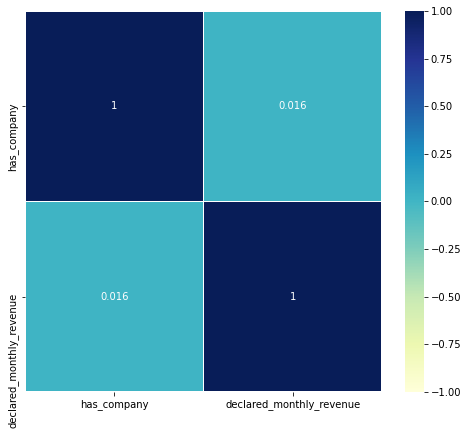

In [ ]:
plt.figure(figsize=(8, 7))
ax = sns.heatmap(deals_clean.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

In [ ]:
nuevo_deals_clean = deals_clean.drop(columns=['mql_id', 'seller_id', 'business_segment', 'lead_type', 'lead_behaviour_profile', 'business_type'])
nuevo_deals_clean.head()

,has_company,declared_monthly_revenue
0,False,0
1,False,0
2,False,0
3,False,0
4,False,0


In [ ]:
X = nuevo_deals_clean.drop(columns=['has_company'])
y = nuevo_deals_clean['has_company']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
logreg.score(X_test, y_test)

0.9367588932806324

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[237,   0],
       [ 16,   0]])

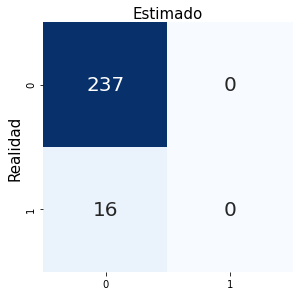

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(4, 4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado', fontsize=15);

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.0
Exactitud: 0.9367588932806324
Sensibilidad: 0.0
Especificidad: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.50163138, 0.49836862],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ]])

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

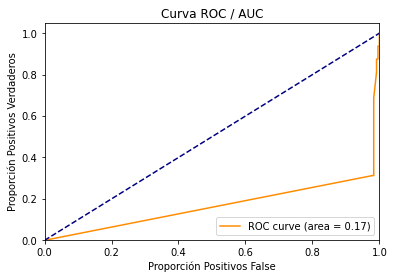

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()